In [1]:
import pandas as pd


In [2]:
df = pd.read_csv('/content/DataCoSupplyChainDataset.csv', encoding_errors='ignore')


In [4]:
df.shape

(8002, 53)

In [5]:
def rename_col(s):
    s = s.replace(' ', '_')
    s = s.replace('-', '_')
    s = s.replace('(', '')
    s = s.replace(')', '')
    a = s.split('_')
    for i in range(len(a)):
        if not all([c == c.upper() for c in a[i]]):
            a[i] = a[i].capitalize()
    return '_'.join(a)

df.columns = [rename_col(c) for c in df.columns]
df.columns

Index(['Type', 'Days_For_Shipping_Real', 'Days_For_Shipment_Scheduled',
       'Benefit_Per_Order', 'Sales_Per_Customer', 'Delivery_Status',
       'Late_Delivery_Risk', 'Category_Id', 'Category_Name', 'Customer_City',
       'Customer_Country', 'Customer_Email', 'Customer_Fname', 'Customer_Id',
       'Customer_Lname', 'Customer_Password', 'Customer_Segment',
       'Customer_State', 'Customer_Street', 'Customer_Zipcode',
       'Department_Id', 'Department_Name', 'Latitude', 'Longitude', 'Market',
       'Order_City', 'Order_Country', 'Order_Customer_Id',
       'Order_Date_Dateorders', 'Order_Id', 'Order_Item_Cardprod_Id',
       'Order_Item_Discount', 'Order_Item_Discount_Rate', 'Order_Item_Id',
       'Order_Item_Product_Price', 'Order_Item_Profit_Ratio',
       'Order_Item_Quantity', 'Sales', 'Order_Item_Total',
       'Order_Profit_Per_Order', 'Order_Region', 'Order_State', 'Order_Status',
       'Order_Zipcode', 'Product_Card_Id', 'Product_Category_Id',
       'Product_Descript

In [8]:
df.head()

,Type,Days_For_Shipping_Real,Days_For_Shipment_Scheduled,Benefit_Per_Order,Sales_Per_Customer,Delivery_Status,Late_Delivery_Risk,Category_Id,Category_Name,Customer_City,...,Order_Zipcode,Product_Card_Id,Product_Category_Id,Product_Description,Product_Image,Product_Name,Product_Price,Product_Status,Shipping_Date_Dateorders,Shipping_Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360.0,73.0,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0.0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360.0,73.0,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0.0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360.0,73.0,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0.0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360.0,73.0,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0.0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360.0,73.0,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0.0,1/15/2018 11:24,Standard Class


In [11]:
df['Order_Date_Dateorders'] = pd.to_datetime(df['Order_Date_Dateorders'], errors='coerce')


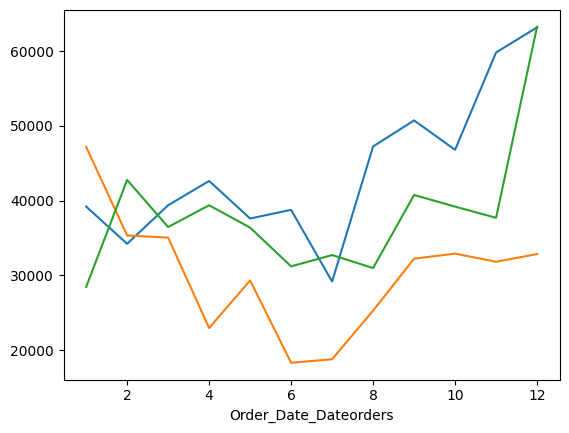

In [12]:
for year in range(2015, 2018):
    group = df[df.Order_Date_Dateorders.dt.year == year].groupby(df.Order_Date_Dateorders.dt.to_period('M')).Sales_Per_Customer.sum()
    group.index = group.index.month
    group.plot(kind='line')

,0
Shipping_Duration_Difference,"Axes(0.125,0.11;0.775x0.77)"


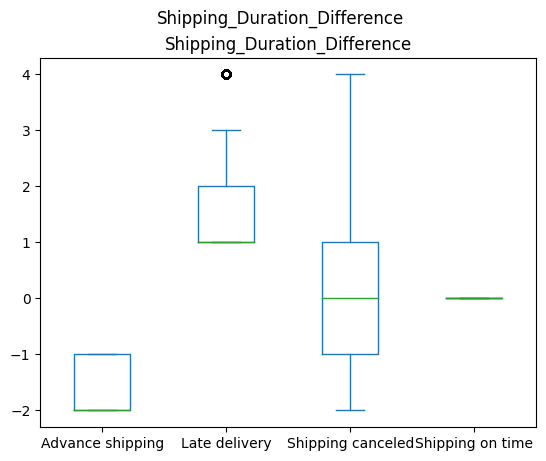

In [13]:
df['Shipping_Duration_Difference'] = df.Days_For_Shipping_Real - df.Days_For_Shipment_Scheduled
df.plot.box(by='Delivery_Status', column='Shipping_Duration_Difference', title='Shipping_Duration_Difference')

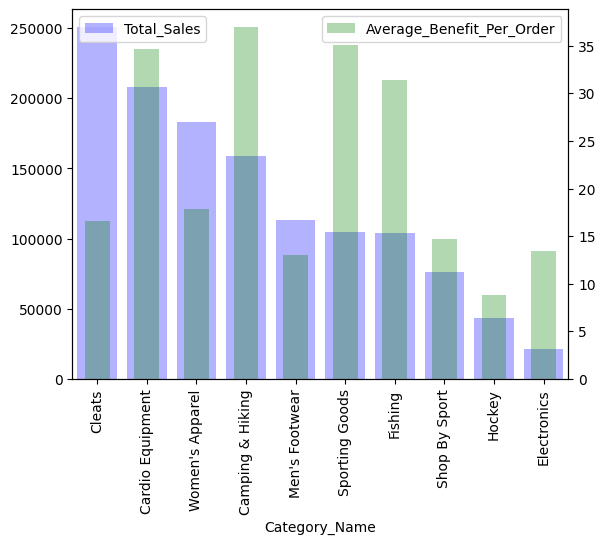

In [14]:
category_performance = df.groupby('Category_Name').agg(
    Total_Sales=('Sales_Per_Customer', 'sum'),
    Average_Benefit_Per_Order=('Benefit_Per_Order', 'mean')
)

category_performance = category_performance.sort_values(by='Total_Sales', ascending=False)
ax1 = category_performance.Total_Sales.head(10).plot(kind='bar', width=0.8, color='blue', alpha=0.3)
ax2 = ax1.twinx()
category_performance.Average_Benefit_Per_Order.head(10).plot(kind='bar', color='green', width=0.5, alpha=0.3, ax=ax2)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

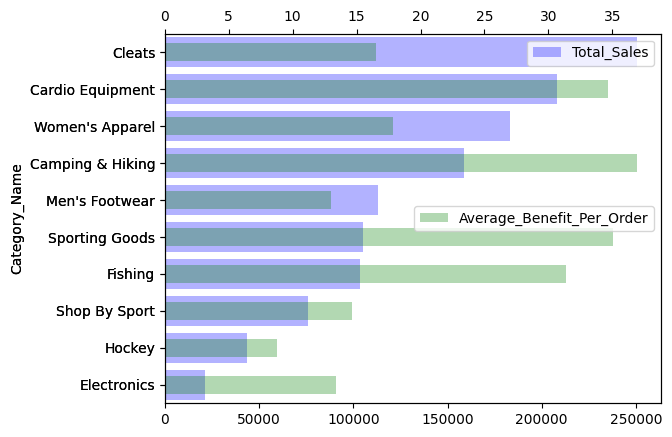

In [15]:
category_performance = df.groupby('Category_Name').agg(
    Total_Sales=('Sales_Per_Customer', 'sum'),
    Average_Benefit_Per_Order=('Benefit_Per_Order', 'mean')
)

category_performance = category_performance.sort_values(by='Total_Sales', ascending=False)

ax1 = category_performance.Total_Sales.head(10).plot(kind='barh', width=0.8, color='blue', alpha=0.3)
ax2 = ax1.twiny()
category_performance.Average_Benefit_Per_Order.head(10).plot(kind='barh', color='green', width=0.5, alpha=0.3, ax=ax2)

ax1.invert_yaxis()
#ax3.invert_yaxis()

ax1.legend(loc='upper right')
ax2.legend(loc='right')
category_performance = df.groupby('Category_Name').agg(
    Total_Sales=('Sales_Per_Customer', 'sum'),
    Average_Benefit_Per_Order=('Benefit_Per_Order', 'mean')
)

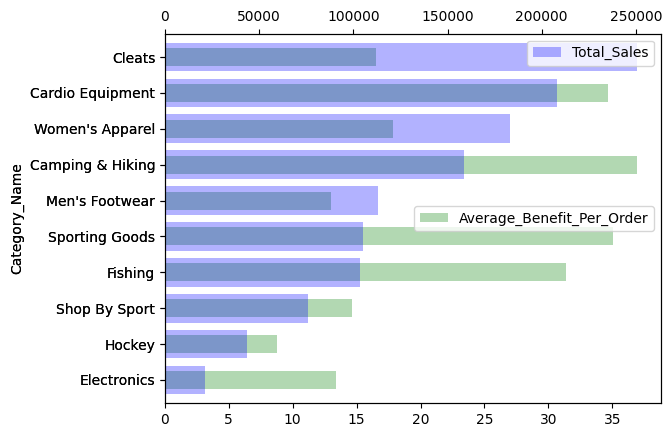

In [16]:
category_performance = category_performance.sort_values(by='Total_Sales', ascending=False)

ax1 = category_performance.Average_Benefit_Per_Order.head(10).plot(kind='barh', color='green', width=0.5, alpha=0.3)
ax2 = ax1.twiny()
category_performance.Total_Sales.head(10).plot(kind='barh', width=0.8, color='blue', alpha=0.3, ax=ax2)

ax1.invert_yaxis()

ax1.legend(loc='right')
ax2.legend(loc='upper right')

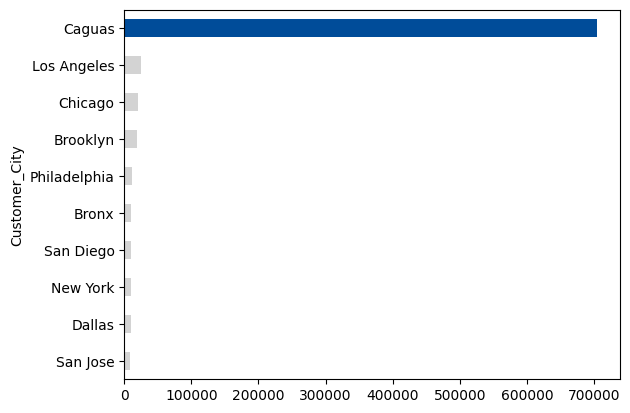

In [17]:
ax = df.groupby('Customer_City').Sales_Per_Customer.sum().sort_values(ascending=False).head(10).sort_values().plot(kind='barh', color='lightgray')
bars = ax.patches
bars[-1].set_facecolor('#004c99')

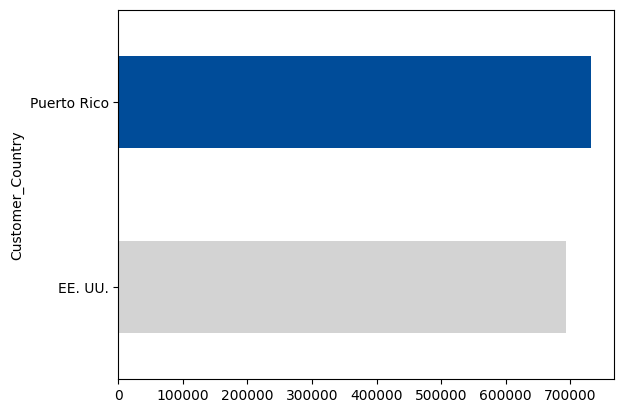

In [18]:
ax = df.groupby('Customer_Country').Sales_Per_Customer.sum().head(10).plot(kind='barh', color='lightgray')
bars = ax.patches
bars[-1].set_facecolor('#004c99')

<Axes: xlabel='Type'>

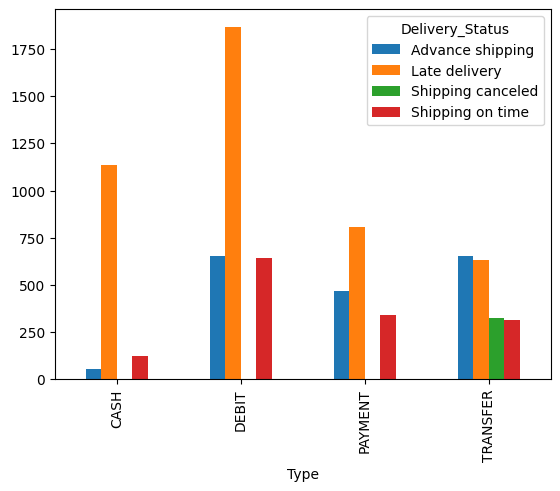

In [19]:
group = df.groupby(['Type', 'Delivery_Status']).Type.count().unstack()
group.plot(kind='bar')

<Axes: xlabel='Type'>

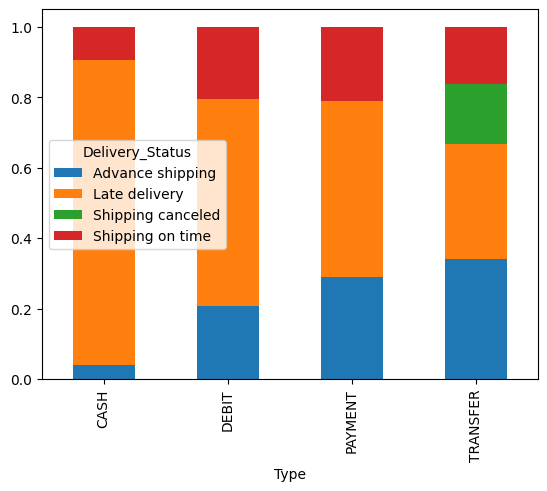

In [20]:
group['Total'] = group.sum(axis=1)
for c in group.columns[:-1]:
    group[c] = group[c] / group.Total
group[group.columns[:-1]].plot(kind='bar', stacked=True)

<Axes: ylabel='Category_Name'>

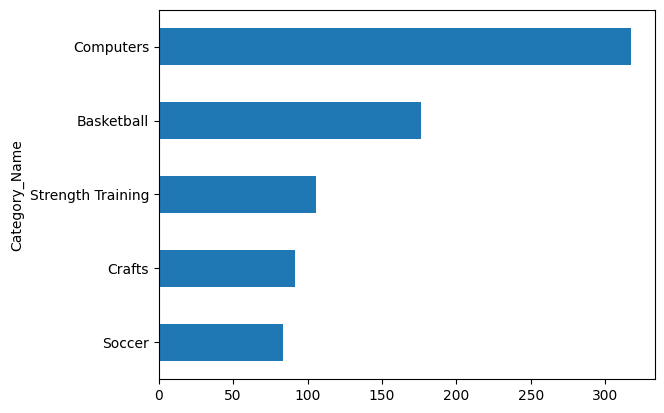

In [21]:
df.groupby('Category_Name').Benefit_Per_Order.mean().sort_values(ascending=False).head().sort_values().plot(kind='barh')


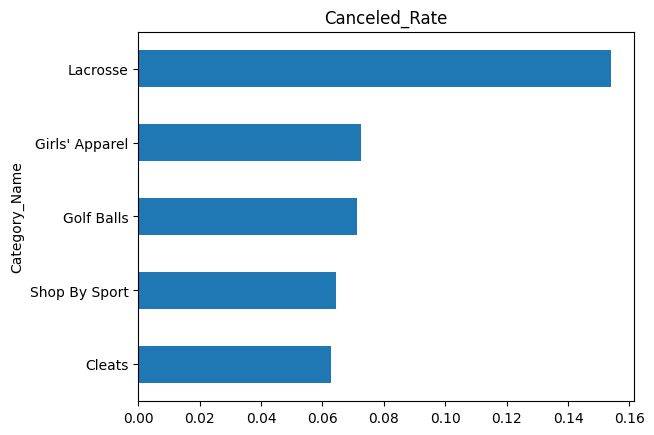

In [22]:
group = df.groupby(['Category_Name','Delivery_Status']).Category_Name.count().unstack()
group['Total'] = group.sum(axis=1)
group['Canceled_Rate'] = group['Shipping canceled'] / group.Total
ax = group.Canceled_Rate.sort_values(ascending=False).head().plot(kind='barh', title='Canceled_Rate')
ax.invert_yaxis()

<Axes: xlabel='Days_For_Shipping_Real', ylabel='Shipping_Mode'>

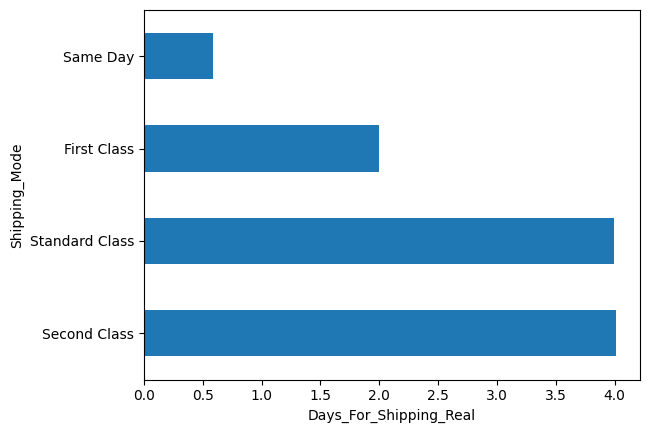

In [23]:
df.groupby('Shipping_Mode').Days_For_Shipping_Real.mean().sort_values(ascending=False).plot(kind='barh', xlabel='Days_For_Shipping_Real')


<Axes: xlabel='Month', ylabel='Sales_Per_Customer'>

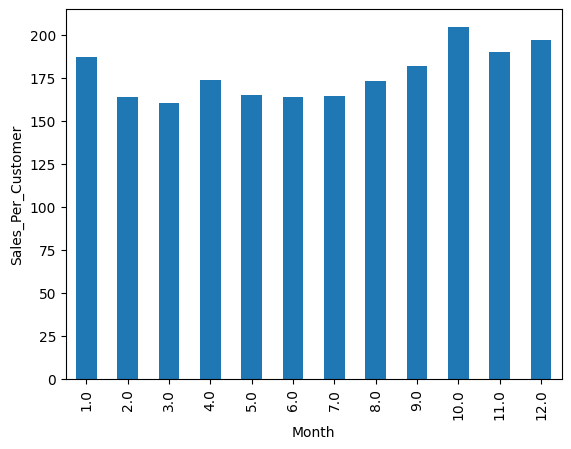

In [24]:
df.groupby(df.Order_Date_Dateorders.dt.month).Sales_Per_Customer.mean().plot(kind='bar', xlabel='Month', ylabel='Sales_Per_Customer')


<Axes: xlabel='Week', ylabel='Sales_Per_Customer'>

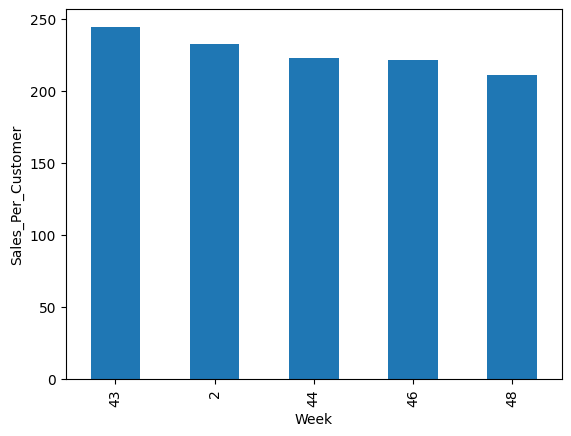

In [25]:
df.groupby(df.Order_Date_Dateorders.dt.isocalendar().week).Sales_Per_Customer.mean().sort_values(ascending=False).head().plot(kind='bar', xlabel='Week', ylabel='Sales_Per_Customer')